In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [4]:
## Load the Dataset
df = pd.read_csv("D:\\4th sem\\student_event_feedback_50k.csv")

In [5]:
df.head()

,Event_Name,Event_Type,Department,Rating,Feedback_Comment
0,Hackathon,Workshop,EEE,1,Poor time management
1,Cyber Security Talk,Technical,Management,2,Poor time management
2,AI Workshop,Workshop,EEE,1,Poor time management
3,Tech Fest,Workshop,Management,5,Highly engaging and interactive session
4,Leadership Workshop,Cultural,CSE,2,Not well organized


In [6]:
# Dataset shape
df.shape

(50000, 5)

### Understand the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Event_Name        50000 non-null  object
 1   Event_Type        50000 non-null  object
 2   Department        50000 non-null  object
 3   Rating            50000 non-null  int64 
 4   Feedback_Comment  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [8]:
df.describe()

,Rating
count,50000.000000
mean,3.005240
std,1.415193
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


### Data Cleaning & Preparation

In [9]:
df.isnull().sum()

Event_Name          0
Event_Type          0
Department          0
Rating              0
Feedback_Comment    0
dtype: int64

## Rating Analysis (Quantitative Insights)

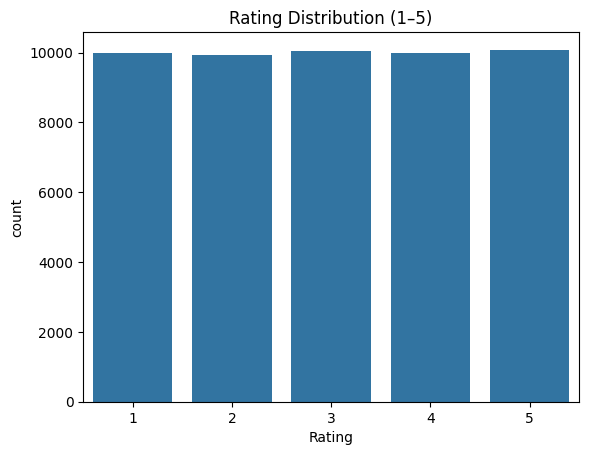

In [10]:
## Overall Rating Distribution
sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution (1–5)")
plt.show()


In [11]:
## Average Rating by Event Type
event_rating = df.groupby('Event_Type')['Rating'].mean().sort_values(ascending=False)
event_rating

Event_Type
Technical    3.015344
Workshop     3.005202
Seminar      3.003263
Cultural     2.997006
Name: Rating, dtype: float64

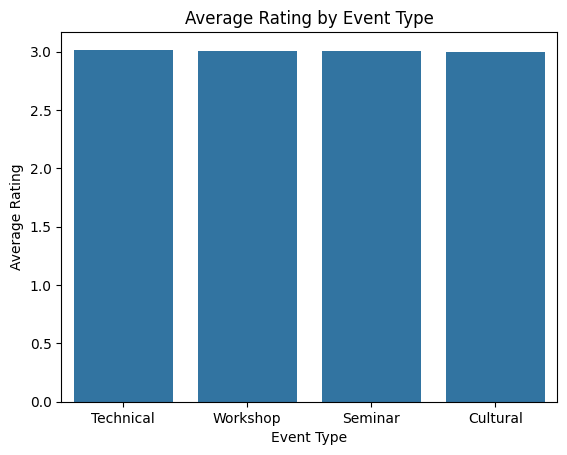

In [12]:
sns.barplot(x=event_rating.index, y=event_rating.values)
plt.title("Average Rating by Event Type")
plt.ylabel("Average Rating")
plt.xlabel("Event Type")
plt.show()

In [13]:
### Average Rating by Department 
dept_rating = df.groupby('Department')['Rating'].mean().sort_values(ascending=False)
dept_rating

Department
IT            3.029567
ECE           3.018963
Arts          3.012782
Management    3.005570
Mechanical    3.003873
EEE           3.002893
CSE           2.987911
Civil         2.979668
Name: Rating, dtype: float64

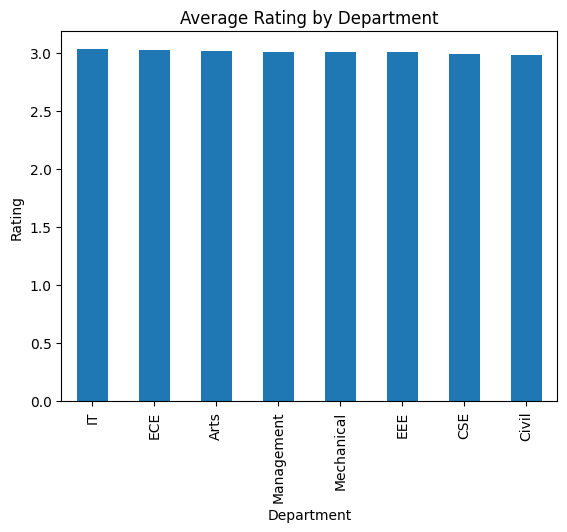

In [14]:
dept_rating.plot(kind='bar')
plt.title("Average Rating by Department")
plt.ylabel("Rating")
plt.show()


### Sentiment Analysis (NLP)

In [15]:
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment_Score'] = df['Feedback_Comment'].apply(get_sentiment_score)

In [17]:
## Convert Score to Sentiment Label
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
df['Sentiment'] = df['Sentiment_Score'].apply(get_sentiment_label)

In [19]:
df[['Feedback_Comment', 'Sentiment_Score', 'Sentiment']].head()

,Feedback_Comment,Sentiment_Score,Sentiment
0,Poor time management,-0.4,Negative
1,Poor time management,-0.4,Negative
2,Poor time management,-0.4,Negative
3,Highly engaging and interactive session,0.4,Positive
4,Not well organized,0.0,Neutral


## Sentiment Distribution Visualization

In [20]:
df['Sentiment'].value_counts()

Sentiment
Positive    30126
Negative    11934
Neutral      7940
Name: count, dtype: int64

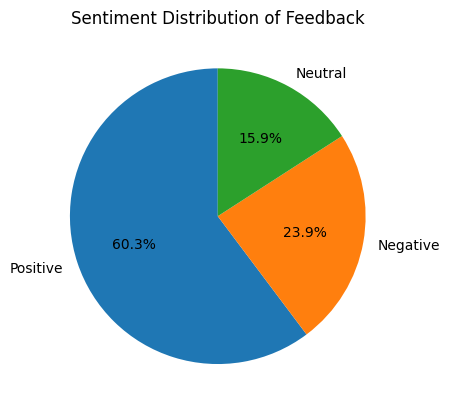

In [21]:
df['Sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sentiment Distribution of Feedback")
plt.ylabel("")
plt.show()

## Relationship Between Rating & Sentiment

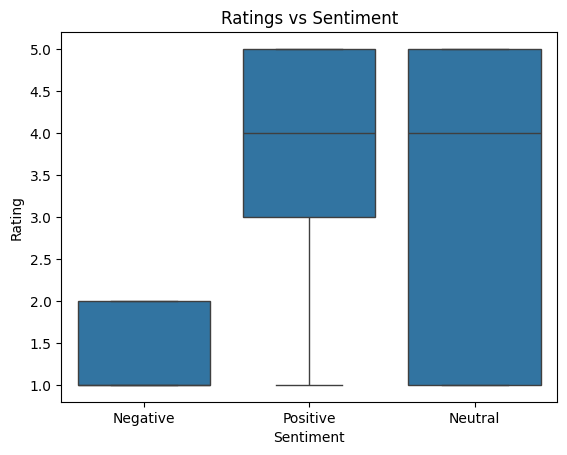

In [22]:
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title("Ratings vs Sentiment")
plt.show()

### Top Events with Highest Satisfaction

In [23]:
top_events = df.groupby('Event_Name')['Rating'].mean().sort_values(ascending=False)
top_events

Event_Name
Startup Meetup           3.038166
Cultural Night           3.030364
Cyber Security Talk      3.022832
Career Seminar           3.018089
Robotics Expo            3.003242
Tech Fest                2.995609
Data Science Bootcamp    2.989794
Hackathon                2.989307
AI Workshop              2.986381
Leadership Workshop      2.979786
Name: Rating, dtype: float64

### Key Insights 
1. Technical events achieved the highest average ratings, followed closely by workshops and seminars, indicating strong student preference for academic and skill-based events.
2. Cultural events recorded slightly lower ratings, suggesting challenges related to event execution and engagement.
3. Department-wise analysis shows IT and ECE departments consistently delivered higher-rated events compared to others.
4. Sentiment analysis reveals that around 60% of feedback is positive, while nearly 24% is negative, highlighting clear improvement opportunities.
5. Career-oriented events such as Startup Meetups and Cyber Security Talks received the highest average ratings among all events.:

### Recommendations
1. Improve event planning and execution, particularly for cultural and large-scale events, to enhance student engagement.
2. Adopt best practices from high-performing departments like IT and ECE to improve event quality across all departments.
3. Redesign intensive formats such as hackathons and AI workshops with better structure, guidance, and time management.
4. Focus more on career-oriented and industry-aligned events, as they consistently receive higher student satisfaction.
5. Regularly analyze student feedback and sentiment trends to make data-driven improvements for future events.